<a href="https://colab.research.google.com/github/keshav-guptaa/EDA_on_Earthquake_Dataset/blob/main/EDA_on_Earthquake_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Earthquake Occurence Exploratory Data Analysis
- Kaggle
- 3.5 Million Records
- Information about Earthquakes
- Can be used to predict upcoming earthquakes and can be used to reduce damage caused by earthquake.

In [1]:
pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

download_url = 'https://www.kaggle.com/datasets/alessandrolobello/the-ultimate-earthquake-dataset-from-1990-2023'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kesavgupta
Your Kaggle Key: ··········


100%|██████████| 116M/116M [00:02<00:00, 57.6MB/s]


Notes =>
- quiet is used to remove o/p of pip command.
- if you are using string, store it in some variable.


In [3]:
data_filename = './the-ultimate-earthquake-dataset-from-1990-2023/Eartquakes-1990-2023.csv'


#Download the data
- Load the file using Pandas
- Look at some information about the data & the columns
- Fix any missing or incorrect values.

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(data_filename)

## Data Preparation and Cleaning

Extract the year from date column by parsing time in the form of string to convert it into timestamp.

In [ ]:
df['year'] = df['date'].apply(lambda x: pd.to_datetime(x).year)

In [73]:
df

,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date,year
0,631153353990,"12 km NNW of Meadow Lakes, Alaska",reviewed,0,96,earthquake,2.50,Alaska,-149.669200,61.730200,30.100,1990-01-01 00:22:33.990000+00:00,1990
1,631153491210,"14 km S of Volcano, Hawaii",reviewed,0,31,earthquake,1.41,Hawaii,-155.212333,19.317667,6.585,1990-01-01 00:24:51.210000+00:00,1990
2,631154083450,"7 km W of Cobb, California",reviewed,0,19,earthquake,1.11,California,-122.806167,38.821000,3.220,1990-01-01 00:34:43.450000+00:00,1990
3,631155512130,"11 km E of Mammoth Lakes, California",reviewed,0,15,earthquake,0.98,California,-118.846333,37.664333,-0.584,1990-01-01 00:58:32.130000+00:00,1990
4,631155824490,"16km N of Fillmore, CA",reviewed,0,134,earthquake,2.95,California,-118.934000,34.546000,16.122,1990-01-01 01:03:44.490000+00:00,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3445746,1690626851941,"5 km NW of Chikusei, Japan",reviewed,0,326,earthquake,4.60,Japan,139.940200,36.350700,83.039,2023-07-29 10:34:11.941000+00:00,2023
3445747,1690626975715,"Kodiak Island region, Alaska",automatic,0,44,earthquake,1.70,Alaska,-153.729900,57.790100,24.400,2023-07-29 10:36:15.715000+00:00,2023
3445748,1690627215940,"12 km W of Alberto Oviedo Mota, B.C., MX",automatic,0,90,earthquake,2.42,B.C.,-115.296833,32.233167,1.770,2023-07-29 10:40:15.940000+00:00,2023
3445749,1690628146040,"7 km W of Cobb, CA",automatic,0,16,earthquake,1.03,California,-122.800499,38.827499,1.720,2023-07-29 10:55:46.040000+00:00,2023


Drop the columns that you are not going to use.

In [ ]:
columns_to_drop = ['place','status','significance','latitude','longitude','date']
df.drop(columns = columns_to_drop, inplace = True)

In [82]:
df

,time,tsunami,data_type,magnitudo,state,depth,year
0,631153353990,0,earthquake,2.50,Alaska,30.100,1990
1,631153491210,0,earthquake,1.41,Hawaii,6.585,1990
2,631154083450,0,earthquake,1.11,California,3.220,1990
3,631155512130,0,earthquake,0.98,California,-0.584,1990
4,631155824490,0,earthquake,2.95,California,16.122,1990
...,...,...,...,...,...,...,...
3445746,1690626851941,0,earthquake,4.60,Japan,83.039,2023
3445747,1690626975715,0,earthquake,1.70,Alaska,24.400,2023
3445748,1690627215940,0,earthquake,2.42,B.C.,1.770,2023
3445749,1690628146040,0,earthquake,1.03,California,1.720,2023


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3445751 entries, 0 to 3445750
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   time          int64  
 1   place         object 
 2   status        object 
 3   tsunami       int64  
 4   significance  int64  
 5   data_type     object 
 6   magnitudo     float64
 7   state         object 
 8   longitude     float64
 9   latitude      float64
 10  depth         float64
 11  date          object 
dtypes: float64(4), int64(3), object(5)
memory usage: 315.5+ MB


Best function to know about data.

In [8]:
df.describe()

,time,tsunami,significance,magnitudo,longitude,latitude,depth
count,3.445751e+06,3.445751e+06,3.445751e+06,3.445751e+06,3.445751e+06,3.445751e+06,3.445751e+06
mean,1.247124e+12,4.434447e-04,7.400973e+01,1.774076e+00,-1.012876e+02,3.746483e+01,2.285387e+01
std,2.976292e+11,2.105346e-02,1.016364e+02,1.291055e+00,7.697416e+01,2.041577e+01,5.484938e+01
min,6.311534e+11,0.000000e+00,0.000000e+00,-9.990000e+00,-1.799997e+02,-8.442200e+01,-1.000000e+01
25%,1.024401e+12,0.000000e+00,1.300000e+01,9.100000e-01,-1.464274e+02,3.406400e+01,3.120000e+00
50%,1.282338e+12,0.000000e+00,3.300000e+01,1.460000e+00,-1.189538e+02,3.793567e+01,7.700000e+00
75%,1.508701e+12,0.000000e+00,8.100000e+01,2.300000e+00,-1.159277e+02,4.784800e+01,1.612000e+01
max,1.690629e+12,1.000000e+00,2.910000e+03,9.100000e+00,1.800000e+02,8.738600e+01,7.358000e+02


In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

7

In [10]:
df.isna().sum()

time            0
place           0
status          0
tsunami         0
significance    0
data_type       0
magnitudo       0
state           0
longitude       0
latitude        0
depth           0
date            0
dtype: int64

Hence, there is no missing value in dataset.
But what if there are missing values, then, we have to check percentage of missing values in each column.
- missing_percentages = df.isna().sum().sort(ascending=False) / len(df)

---
Now we can plot this missing percentage, as it is single column hence it is series data, we will only **plot column with greater than zero missing percentage**.
And from graph we can know that in which column values are frequently missing, so we can **drop those columns from dataframe**



## Exploratory Analysis and Visualisation
Columns we'll analyze
1. State
2. Magnitude
3. Tsunami



##State

In [11]:
states = df['state'].unique()
len(states)


858

In [12]:
states_by_earthquake = df['state'].value_counts()
states_by_earthquake[:6]

 California    866675
 Alaska        777881
California     491689
 Nevada        174065
 Hawaii        125336
 Washington     80483
Name: state, dtype: int64

<Axes: >

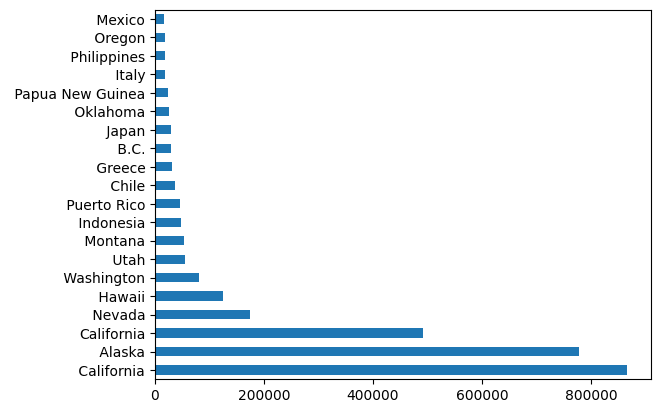

In [13]:
states_by_earthquake[:20].plot(kind='barh')

In [14]:
'India' in df['state']

False

In [15]:
earthquake_prone_areas = states_by_earthquake[states_by_earthquake > 200]
(len(earthquake_prone_areas)/len(states))*100

26.107226107226104

<Axes: xlabel='state', ylabel='Count'>

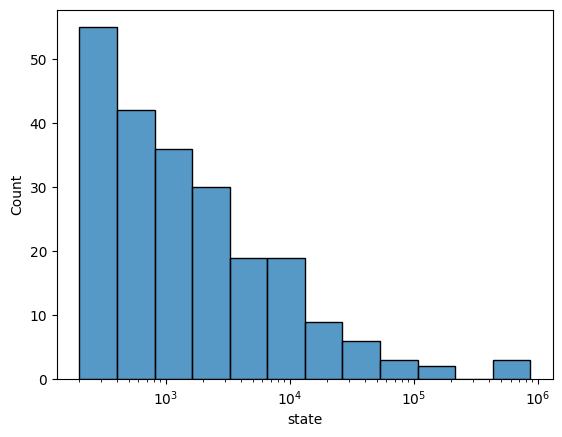

In [100]:
sns.histplot(earthquake_prone_areas, log_scale=True)

In [17]:
len(states_by_earthquake[states_by_earthquake < 5])

242

##Magnitude

In [26]:
magnitude_less_than_5 = (df['magnitudo'] < 5).sum()
magnitude_less_than_5

3390859

In [38]:
percentage_of_low_impact_earthquakes = (magnitude_less_than_5/len(df['magnitudo']))*100
percentage_of_low_impact_earthquakes

98.4069655642558

In [30]:
magnitude_between_5_and_7 = ((df['magnitudo'] > 5) & (df['magnitudo'] < 7)).sum()
magnitude_between_5_and_7

42377

In [31]:
magnitude_greater_than_7 = (df['magnitudo'] > 7).sum()
magnitude_greater_than_7

396

In [39]:
percentage_of_high_impact_earthquakes = (magnitude_greater_than_7/len(df['magnitudo']))*100
percentage_of_high_impact_earthquakes

0.011492414861085435

In [84]:
earthquakes_greater_than_7 = df[df['magnitudo'] > 7]
earthquakes_greater_than_7

,time,tsunami,data_type,magnitudo,state,depth,year
10713,636466587960,0,earthquake,7.6,south of the Fiji Islands,33.200,1990
11325,636655092570,0,earthquake,7.1,Vanuatu,20.700,1990
14545,638371375600,0,earthquake,7.3,Costa Rica,22.200,1990
16031,639349955550,0,earthquake,7.6,Northern Mariana Islands,11.400,1990
18373,640445959010,0,earthquake,7.8,Indonesia,25.700,1990
...,...,...,...,...,...,...,...
3415834,1683734520334,1,earthquake,7.6,Tonga,210.000,2023
3418967,1684465023172,1,earthquake,7.7,southeast of the Loyalty Islands,18.053,2023
3419455,1684547459158,1,earthquake,7.1,southeast of the Loyalty Islands,27.309,2023
3429841,1686852388572,1,earthquake,7.2,Tonga,179.000,2023


In [101]:
earthquakes_by_year = earthquakes_greater_than_7['year'].value_counts().reset_index()
earthquakes_by_year.columns = ['Year', 'Count']
earthquakes_by_year = earthquakes_by_year.sort_values(by='Year').reset_index()
earthquakes_by_year.drop('index', axis = 1, inplace = True)
earthquakes_by_year

,Year,Count
0,1990,16
1,1991,8
2,1992,12
3,1993,6
4,1994,10
5,1995,18
6,1996,13
7,1997,12
8,1998,8
9,1999,13


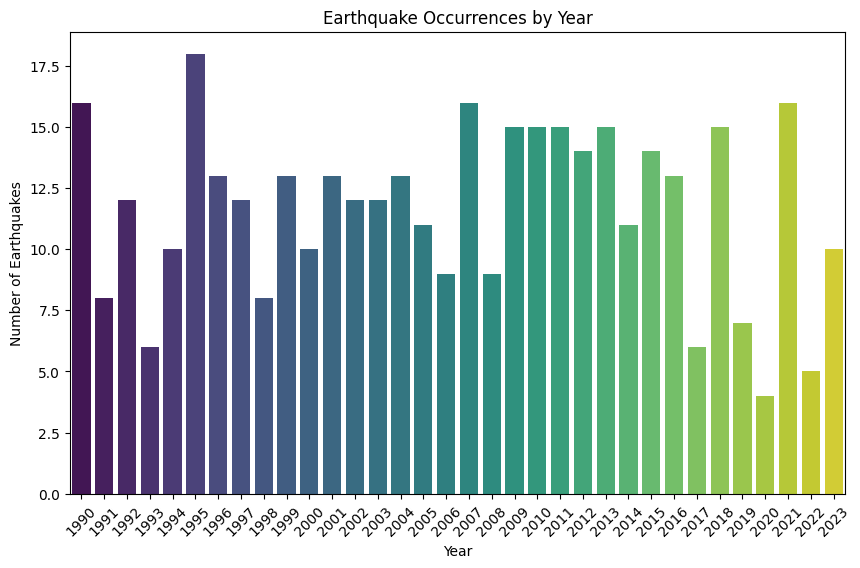

In [106]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Count', data=earthquakes_by_year, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.title('Earthquake Occurrences by Year')
plt.xticks(rotation=45)
plt.show()

I have used the **Google Colab** suggestions for charts to draw the chart given below.

In [107]:
import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(earthquakes_by_year, *['Year', 'Count', None], **{})
chart

##Tsunami

In [116]:
tsunami_by_earthquake = df[df['tsunami'] == 1]
tsunami_by_earthquake

,time,tsunami,data_type,magnitudo,state,depth,year
1983658,1360113145830,1,earthquake,8.0,Solomon Islands,24.000,2013
1984525,1360263556270,1,earthquake,6.7,Solomon Islands,11.000,2013
1984795,1360321931510,1,earthquake,6.8,Solomon Islands,12.000,2013
1984881,1360337198470,1,earthquake,7.1,Solomon Islands,21.000,2013
1985228,1360419367880,1,earthquake,6.9,Colombia,145.000,2013
...,...,...,...,...,...,...,...
3438758,1688936268377,1,earthquake,3.9,Alaska,127.600,2023
3439082,1689020906215,1,earthquake,6.6,Antigua and Barbuda,14.000,2023
3441336,1689490102606,1,earthquake,7.2,Alaska,32.571,2023
3442091,1689631145068,1,earthquake,4.9,Alaska,48.498,2023


In [117]:
len(tsunami_by_earthquake)

1528

In [115]:
tsunami_percentage = (len(tsunami_by_earthquake)/len(df))*100
tsunami_percentage

0.04434446946398623

In [144]:
tsunami_by_year = tsunami_by_earthquake['year'].value_counts().reset_index()
tsunami_by_year.columns = ['Year', 'Count']
tsunami_by_year = tsunami_by_year.sort_values(by='Year').reset_index()
tsunami_by_year.drop('index', axis = 1, inplace = True)
tsunami_by_year

,Year,Count
0,2013,153
1,2014,181
2,2015,150
3,2016,155
4,2017,154
5,2018,175
6,2019,133
7,2020,120
8,2021,108
9,2022,126


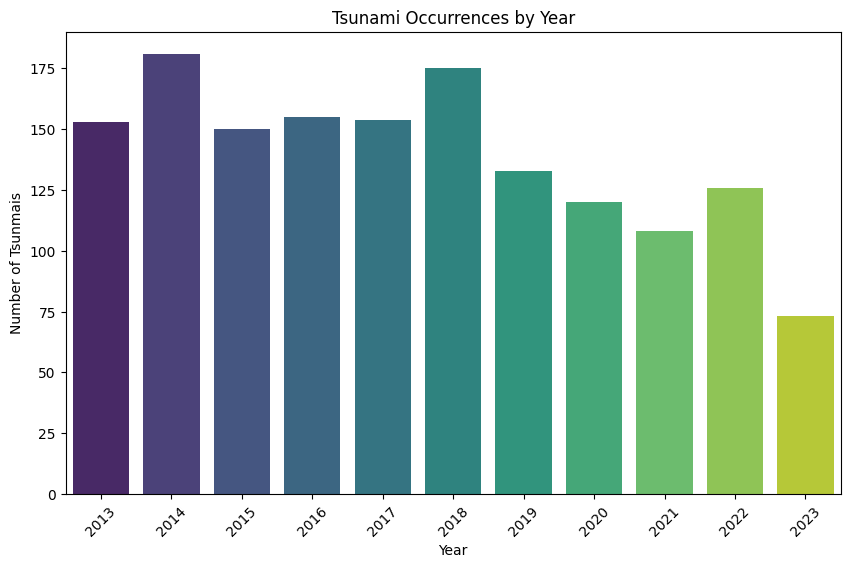

In [134]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Count', data=tsunami_by_year, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Number of Tsunmais')
plt.title('Tsunami Occurrences by Year')
plt.xticks(rotation=45)
plt.show()

In [135]:
percentage_of_tsunamis_by_earthquake_greater_than_magnitude_5 = (len(tsunami_by_earthquake[tsunami_by_earthquake['magnitudo'] > 5])/len(tsunami_by_earthquake))*100
percentage_of_tsunamis_by_earthquake_greater_than_magnitude_5

49.21465968586388

####Frequency of Earthquakes and Tsunamis by Year after 2012

In [152]:
earthquakes_after_2012 = df[df['year'] > 2012]
total_earthquakes_by_year = earthquakes_after_2012['year'].value_counts().reset_index()
total_earthquakes_by_year.columns = ['Year', 'Count']
total_earthquakes_by_year = total_earthquakes_by_year.sort_values(by='Year').reset_index()
total_earthquakes_by_year.drop('index', axis = 1, inplace = True)
total_earthquakes_by_year

,Year,Count
0,2013,114824
1,2014,136681
2,2015,125235
3,2016,123817
4,2017,132802
5,2018,130859
6,2019,143832
7,2020,175409
8,2021,160526
9,2022,145779


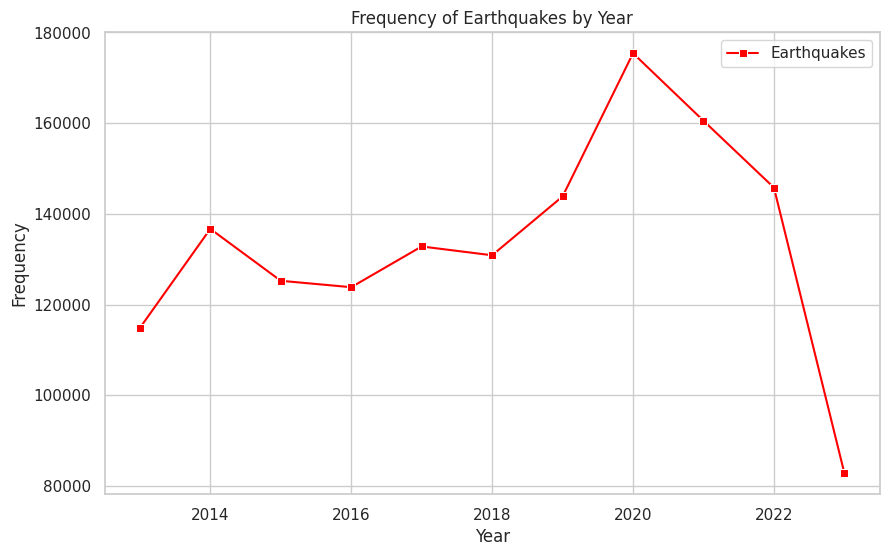

In [154]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Count', data=total_earthquakes_by_year, label='Earthquakes', color='red', marker='s')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of Earthquakes by Year')
plt.legend()
plt.grid(True)
plt.show()

In [164]:
high_magnitude_earthquakes_after_2012 = df[(df['year'] > 2012) & (df['magnitudo'] > 6)]
high_magnitude_earthquakes_by_year = high_magnitude_earthquakes_after_2012['year'].value_counts().reset_index()
high_magnitude_earthquakes_by_year.columns = ['Year', 'Count']
high_magnitude_earthquakes_by_year = high_magnitude_earthquakes_by_year.sort_values(by='Year').reset_index()
high_magnitude_earthquakes_by_year.drop('index', axis = 1, inplace = True)
high_magnitude_earthquakes_by_year

,Year,Count
0,2013,108
1,2014,124
2,2015,113
3,2016,113
4,2017,83
5,2018,99
6,2019,92
7,2020,83
8,2021,119
9,2022,90


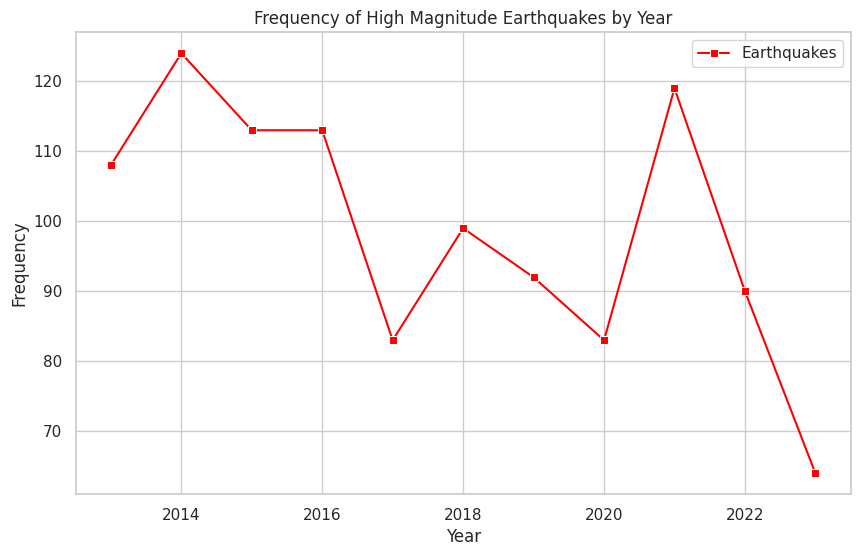

In [165]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Count', data=high_magnitude_earthquakes_by_year, label='Earthquakes', color='red', marker='s')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of High Magnitude Earthquakes by Year')
plt.legend()
plt.grid(True)
plt.show()

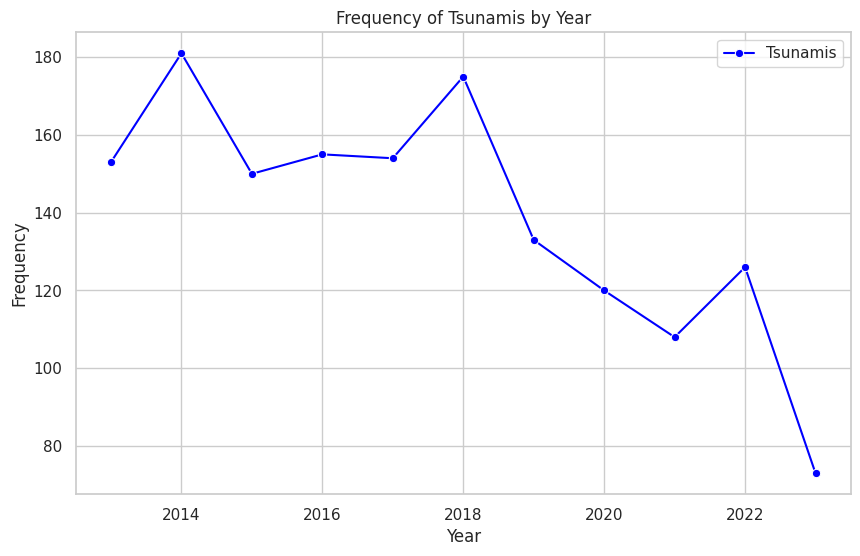

In [156]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Count', data=tsunami_by_year, label='Tsunamis', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of Tsunamis by Year')
plt.legend()
plt.grid(True)
plt.show()

In [166]:
(len(high_magnitude_earthquakes_after_2012[high_magnitude_earthquakes_after_2012['tsunami'] == 1])/len(high_magnitude_earthquakes_after_2012))*100

40.99264705882353

## Summary And Conclusion

1. Total 858 states are affected by Earthquakes from 1990 to present day.
2. The number of earthquakes per state decreases exponentially.
3. Top 5 Most affected states => California, Alaska, Nevada, Hawaii, Washington.
4. India is not present in the dataset.
5. There are 224 states with 200+ earthquakes in this period. It means 26% states lie in earthquake prone areas.
6. There are 242 states with less than 5 occurences of earthquake.
7. There are 3390859 earthquakes with magnitude less than 5. Hence, 98.4% earthquakes are of low impact.
8. Only 0.01% earthquakes have magnitude greater than 7.
9. From 2009 to 2013, we witnessed earthquakes with magnitude greater than 7 frequently.
10. 2020 is the year from 1990 to 2023 with least number of high magnitude(> 7) earthquakes.
11. Chances of Tsunami because of Earthquake is 0.04%. There are total 1528 instances when earthquake is the reason behind tsunami in the period of 1990-2023.
12. In the given dataset, data of Tsunami is available from 2013.
13. 49.2% of Tsunamis are cause by earthquakes with magnitude greater than 5.
14. There is no direct relation between frequency of earthquakes and frequency of Tsunamis.
15. If there is a earthquake of magnitude gretaer than 6, then in 40% cases, there will be tsunami.